# C_Elegans_DME_imagedata_analysis-transition_days-LDA

## Version 2.x WND-CHARM features, & w/o mean/std normalization

## Package versions used below

In [1]:
from wndcharm import diagnostics

In [2]:
print diagnostics

WND-CHARM Python API Diagnostics
Executable:
	/usr/local/opt/python/bin/python2.7
PYTHONPATH environment variable:
	/Users/colettace/src/wnd-charm/build/lib.macosx-10.10-x86_64-2.7
WND-CHARM library path:
	/Users/colettace/src/wnd-charm/build/lib.macosx-10.10-x86_64-2.7/wndcharm/wndcharm.pyc
Package versions:
	python    	2.7.11 (default, Jan 22 2016, 08:28:37)  [GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]
	wndcharm  	0.9.14+d664975
	numpy     	1.11.1
	scipy     	0.18.0
	matplotlib	1.5.1
	sklearn   	0.17.1
	skimage   	0.11.3
	IPython   	5.0.0
	tifffile  	0.7.0
	PIL       	1.1.7
	pandas    	0.17.1



In [3]:
from wndcharm.FeatureSpace import FeatureSpace

In [4]:
from wndcharm.FeatureSpacePrediction import FeatureSpaceClassification

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
from matplotlib.table import table # factory function to generate Table instance

In [8]:
from scipy.spatial.distance import pdist, cdist, squareform

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Load features

In [10]:
pwd

u'/Users/colettace/projects/dme_pca'

In [11]:
ls *.fit

167Evens.fit*
All.fit*
StateB.fit*
StateB_n320-l-S2048_341StateLabels.fit
StateB_n320-l.fit
StateBalanced.fit*
dme_c_elegans_lifeaspan_LDA_featspace.fit
dme_c_elegans_lifeaspan_v3.2features_curated.fit
dme_c_elegans_lifeaspan_v3.2features_curated2.fit
dme_c_elegans_lifeaspan_v3.2features_curated3.fit
dme_c_elegans_lifespan-l.fit


In [12]:
stateb = FeatureSpace.NewFromFitFile('StateB.fit')

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE StateB.fit: <FeatureSpace "StateB.fit" n_features=2919 n_total_samples=320 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 64, "1": 64, "2": 64, "3": 64, "4": 64)>


In [13]:
stateb.feature_set_version

'2.2'

In [14]:
trans = FeatureSpace.NewFromFitFile('./pharynx_classification_results/dme_celegans_microarray_samples_v2.2features.fit' )

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE ./pharynx_classification_results/dme_celegans_microarray_samples_v2.2features.fit: <FeatureSpace "dme_celegans_microarray_samples_v2.2features.fit" n_features=2919 n_total_samples=2034 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 151, "1": 564, "2": 638, "3": 560, "4": 121)>


In [15]:
trans.feature_set_version

'2.2'

# Create LDA space for StateB data set

Train an LDA model to transform the StateB training set, then use that model to transform the transition day test set. Is the model overfit, i.e., is the model generalizable to data it hasn't seen before? To answer that question we look at the distribution of coordinates of the post-transformed space.

In [16]:
stateb

<FeatureSpace "StateB.fit" n_features=2919 n_total_samples=320 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 64, "1": 64, "2": 64, "3": 64, "4": 64)>

In [17]:
stateb.LDATransform( inplace=True )

LDA TRANSFORMED FEATURE SPACE: <FeatureSpace "StateB.fit (LDA transformed)" n_features=4 n_total_samples=320 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 64, "1": 64, "2": 64, "3": 64, "4": 64)>


/usr/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


<FeatureSpace "StateB.fit (LDA transformed)" n_features=4 n_total_samples=320 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 64, "1": 64, "2": 64, "3": 64, "4": 64)>

In [18]:
stateb.data_matrix.shape

(320, 4)

In [19]:
stateb.shape

(320, 4)

## Histogram of the training set

In [20]:
stateb.data_matrix.max(axis=0), stateb.data_matrix.min(axis=0)

(array([ 6.82406889,  5.82226068,  3.83290524,  3.24317489]),
 array([-4.55135872, -4.04615241, -4.51906157, -3.75295707]))

In [21]:
%matplotlib inline

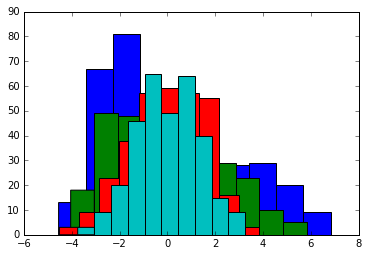

In [22]:
for i in xrange( 4):
    plt.hist( stateb.data_matrix[ :, i])

No wackyness here. Now do the test set.

In [23]:
trans.LDATransform( reference_features=stateb, inplace=True )

LDA TRANSFORMED FEATURE SPACE AGAINST StateB.fit (LDA transformed), RESULT: <FeatureSpace "dme_celegans_microarray_samples_v2.2features.fit (LDA transformed)" n_features=4 n_total_samples=2034 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 151, "1": 564, "2": 638, "3": 560, "4": 121)>


<FeatureSpace "dme_celegans_microarray_samples_v2.2features.fit (LDA transformed)" n_features=4 n_total_samples=2034 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 151, "1": 564, "2": 638, "3": 560, "4": 121)>

In [24]:
trans.shape

(2034, 4)

In [25]:
trans.data_matrix.max(axis=0), trans.data_matrix.min(axis=0)

(array([   9.05988908,  145.53067997,  340.62640741,    9.47203525]),
 array([-572.4293085 ,   -9.04052557,  -22.2383181 , -725.00969733]))

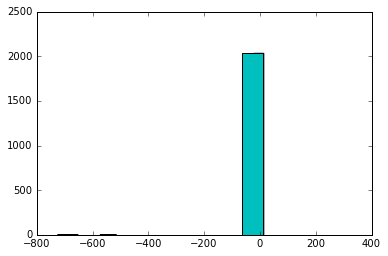

In [26]:
for i in xrange( 4):
    plt.hist( trans.data_matrix[ :, i])

From this distribution we see we have a few transition day samples whose post-LDA-transform put their coordinates far far outside the distribution of the training set. Look for any samples that have a coordinate greater than 8 or less than -8.

In [27]:
bad_samples = set()
for i in xrange( 4 ):
    vector = trans.data_matrix[:,i]
    
    truth_table = [ _ > 8 for _ in vector ]
    above = np.array( truth_table, dtype=int).sum()
    bad_samples |= set( np.where(truth_table)[0] )
    truth_table = [ _ < -8 for _ in vector ]
    below = np.array( truth_table, dtype=int).sum()
    bad_samples |= set( np.where(truth_table)[0])
    print i, above, below
print len( bad_samples )

0 2 1
1 3 2
2 1 5
3 1 7
10


In [28]:
bad_samples

{199, 376, 750, 1050, 1105, 1376, 1423, 1442, 1761, 1980}

In [29]:
trans.SampleReduce( leave_out_sample_group_ids=bad_samples, inplace=True)

SAMPLE REDUCED FEATURE SPACE:  <FeatureSpace "dme_celegans_microarray_samples_v2.2features.fit (LDA transformed) (subset) (sorted)" n_features=4 n_total_samples=2024 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 151, "1": 562, "2": 635, "3": 556, "4": 120)>


<FeatureSpace "dme_celegans_microarray_samples_v2.2features.fit (LDA transformed) (subset) (sorted)" n_features=4 n_total_samples=2024 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 151, "1": 562, "2": 635, "3": 556, "4": 120)>

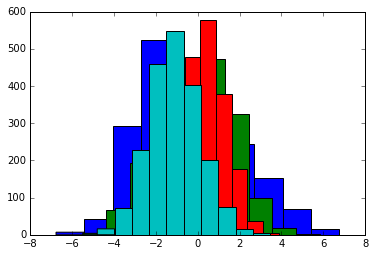

In [30]:
for i in xrange( 4):
    plt.hist( trans.data_matrix[ :, i])

Only 10 total outliers post-transform out of a total 2034. That's pretty good. It means our model is generalizable and usable.

## Helper functions

In [31]:
from math import pi, sqrt

In [32]:
def DendrogramPlusTable( param_space, labels, chart_title=None, figsize=(8,6), fig=None, ax=None):

    from scipy.cluster.hierarchy import linkage, dendrogram
    
    num_samples, num_dimensions = param_space.shape
    
    # fig, axes = plt.subplots(figsize=(15,5))
    if fig is None and ax is None:
        fig = plt.figure( figsize=figsize )
        ax = fig.add_subplot(111)
    elif fig is None:
        fig = ax.get_figure()
    elif ax is None:
        ax = fig.gca()

    fig.suptitle( chart_title, fontsize=20, y=1.20 )

    centroids = []
    #mean_dists_to_own_cent = []
    #std_dists_to_own_cent = []
    seventy_fifth_percentiles = []
    ninety_fifth_percentiles = []
    class_labels = sorted( list( set( labels ) ) )

    for label in class_labels:
        indices = np.where( [ gt == label for gt in labels] )
        class_features = param_space[ indices ]
        class_centroid = class_features.mean(axis=0)
        centroids.append( class_centroid )
        dists_to_own_cent = cdist( class_features, [class_centroid] )
        #mean_dists_to_own_cent.append( dists_to_own_cent.mean() )
        #std_dists_to_own_cent.append( dists_to_own_cent.std() )
        i75, i95 = np.percentile( dists_to_own_cent, [75,95] )
        seventy_fifth_percentiles.append( i75)
        ninety_fifth_percentiles.append( i95 )

    npcentroids = np.array( centroids )
    dist_mat = squareform( pdist( npcentroids ) )
    unit_dist_mat = dist_mat / dist_mat.max()
    siml_mat = np.ones_like( unit_dist_mat ) - unit_dist_mat
    #linkage_mat = linkage( siml_mat )
    linkage_mat = linkage( siml_mat, 'ward')

    dn = dendrogram( linkage_mat, ax=ax,
           color_threshold=1,
           distance_sort='ascending',
           labels=class_labels,
           show_leaf_counts=True)

    cell_text = []

    for i, centroid_row in enumerate( dist_mat ):
        # for top triangle, pack the left side with spaces
        row = [ '' for j in xrange( i ) ]
        sub_row = centroid_row[i:]

        for val in sub_row:
            row.append( "{:0.2f}".format( val ) )

        #dist_std = std_dists_to_own_cent[i]
        i75 = seventy_fifth_percentiles[i]
        i95 = ninety_fifth_percentiles[i]
        row.append( "{:0.2f}".format( i75 ) )
        row.append( "{:0.2f}".format( i95 ) )
        cell_text.append( row )

    tab = table(ax=ax,
          cellText=cell_text, cellColours=None,
          cellLoc='right', colWidths=None,
          rowLabels=class_labels, rowLoc='left',
          colLabels=class_labels + [ '75%-ile', '95%-ile' ],  colLoc='center',
          loc='top', bbox=None, edges='closed')

    return fig

# Dendrogram for training set only (no transitions)

In [33]:
training_space = stateb.data_matrix
training_labels = stateb._contiguous_ground_truth_labels

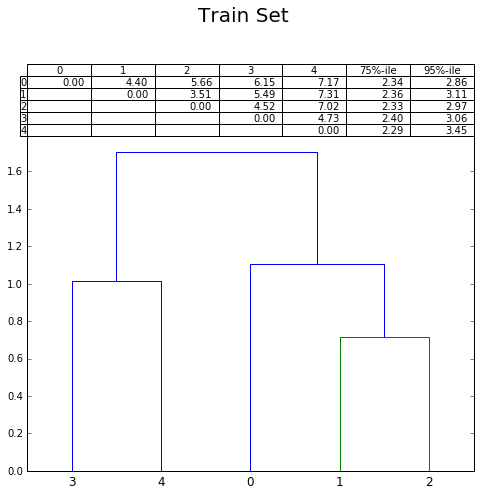

In [34]:
fig = DendrogramPlusTable( training_space, training_labels, chart_title='Train Set')

In [35]:
def PerClassCDF( param_space, labels, chart_title=None):

    class_labels = sorted( list( set( labels ) ) )
    
    n2 = len( class_labels )
    colors = plt.cm.jet( [ float(i)/(n2-1) for i in xrange(n2) ] )
    
    subplot_width = 7
    subplot_height = 7
    subplot_rows = len( class_labels )
    subplot_cols = 2
    subplot_grid_shape = (subplot_rows, subplot_cols)
    figsize = (subplot_width * subplot_cols, subplot_height * subplot_rows)
    fig = plt.figure( figsize=figsize )
    #fig.suptitle( chart_title, fontsize=20, y=.92 )
    
    subplot_title_fontsize = 12

    for i, (label, color) in enumerate( zip( class_labels, colors ) ):
        indices = np.where( [ gt == label for gt in labels] )
        class_features = param_space[ indices ]
        class_centroid = class_features.mean(axis=0)
        dists_to_own_cent = cdist( class_features, [class_centroid] )
        mean = dists_to_own_cent.mean()
        stdev = dists_to_own_cent.std()

        title = 'Histogram of Class {0} Dists to own centroid\nn={1}, mean dist={2:0.2f}, std of dists={3:0.2f}'.format( label, len( class_features ), mean, stdev )
        ax = plt.subplot2grid(subplot_grid_shape, (i,0))
        ax.hist( dists_to_own_cent, 20, facecolor=color, histtype='stepfilled' )
        ax.set_title( title, fontsize=18 )
        
        i75, i95 = np.percentile( dists_to_own_cent, [75,95] )
        ax = plt.subplot2grid(subplot_grid_shape, (i,1))
        ax.hist( dists_to_own_cent, 20, facecolor=color, histtype='stepfilled', cumulative=True )
        title = 'Class {} CDF\n75%-ile={:0.3f}, 95%-ile={:0.3f}'.format( label,i75,i95 )
        ax.set_title( title, fontsize=18 )

    return fig

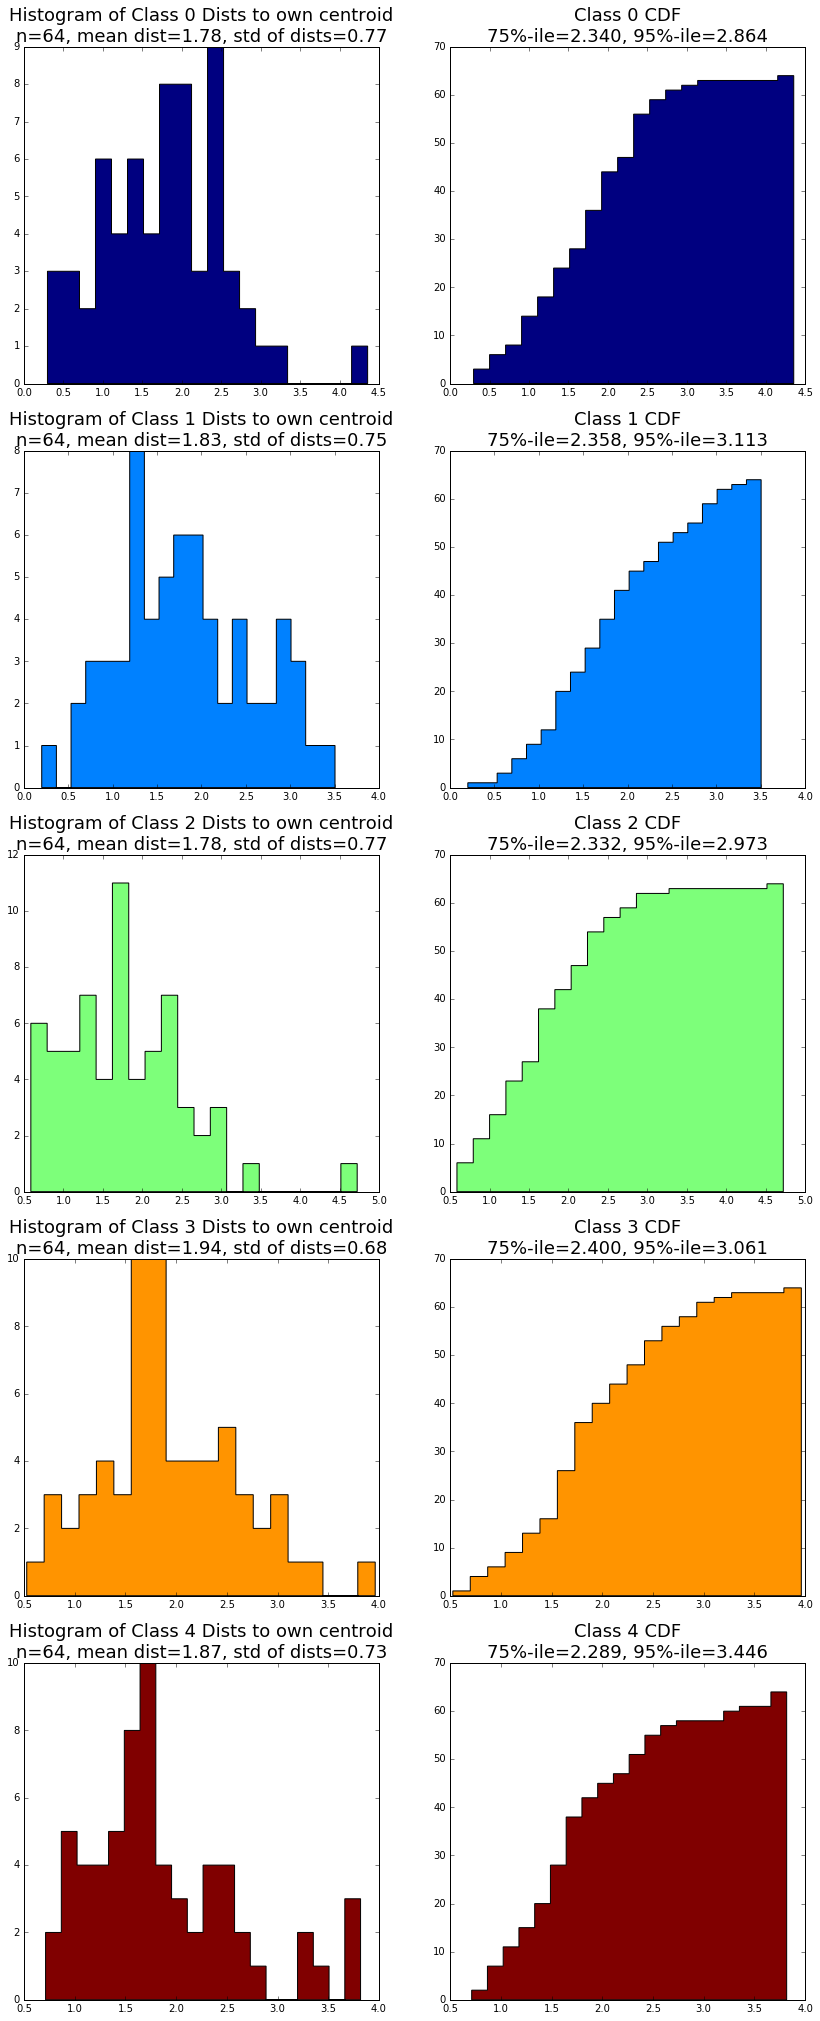

In [36]:
fig = PerClassCDF( training_space, training_labels)

# Plot each state's early and late samples in same LDA space

## Microarray batch info

In [37]:
use_these = {
#Microarray sample 1C
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-13/0
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-13/1
'2014-01-13': [('1', '1C'),],

#Microarray sample 2A (state 1 late)
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-29/1
#Microarray sample 3A (state 2 early)
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-29/2 
'2014-01-29' : [('1','2A'), ('2', '3A'),],
    
#Microarray sample 4E (late state 2)
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2013-12-09/2/*.tif
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2013-12-09/3/*.tif
'2013-12-09' : [('2', '4E'),],

#Microarray sample 5H (early state 3) (Example of 2 vs. 3)
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-06/2    
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-06/3
'2014-02-06' : [('3', '5H'),],

#Microarray sample 6F (late state 3 and early state 4 worms)
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-12/3  
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-12/4
'2014-02-12' : [('3','6F'),],

#Microarray sample 4J
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2015-05-08/2    
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2015-05-08/3
'2015-05-08' : [('2','4J'),],

#Microarray sample 5K
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2015-05-11/2    
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2015-05-11/3
'2015-05-11' : [('3','5K'),],

#Microarray sample 4D
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2013-12-10/2   
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2013-12-10/3
'2013-12-10' : [('2','4D'),],

#Microarray sample 3B
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-08/2  
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-08/3
'2014-01-08' : [('2','3B'),],

#Microarray sample 1C
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-13/0  
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-13/1
'2014-01-13' : [('1','1C'),],

#Microarray sample 3D
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-15/2   
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-15/3
'2014-01-15' : [('2','3D'),],

#Microarray sample 1B
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-17/0
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-17/1
'2014-01-17' : [('1','1B'),],

#Microarray sample 1A
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-23/0   
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-23/1
'2014-01-23' : [('1','1A'),],

#Microarray sample 2F
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-04/1    
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-04/2
'2014-02-04' : [('1','2F'),],

#Microarray sample 2G
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-05/1   
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-05/2
'2014-02-05' : [('1','2G'),],

#Microarray sample 5I
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-07/2    
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-07/3
'2014-02-07' : [('3','5I'),],

#Microarray sample 6B
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-24/3 
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-24/4
'2014-01-24' : [('3','6B'),],

#Microarray sample 6E
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-03-31/3  
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-03-31/4
'2014-03-31' : [('3','6E'),] }

In [38]:
use_these

{'2013-12-09': [('2', '4E')],
 '2013-12-10': [('2', '4D')],
 '2014-01-08': [('2', '3B')],
 '2014-01-13': [('1', '1C')],
 '2014-01-15': [('2', '3D')],
 '2014-01-17': [('1', '1B')],
 '2014-01-23': [('1', '1A')],
 '2014-01-24': [('3', '6B')],
 '2014-01-29': [('1', '2A'), ('2', '3A')],
 '2014-02-04': [('1', '2F')],
 '2014-02-05': [('1', '2G')],
 '2014-02-06': [('3', '5H')],
 '2014-02-07': [('3', '5I')],
 '2014-02-12': [('3', '6F')],
 '2014-03-31': [('3', '6E')],
 '2015-05-08': [('2', '4J')],
 '2015-05-11': [('3', '5K')]}

In [39]:
prep_map = {}

for day, use_list in use_these.items():
    for state, prep in use_list:
        prep_map[ prep ] = ( day, state)

In [40]:
prep_map

{'1A': ('2014-01-23', '1'),
 '1B': ('2014-01-17', '1'),
 '1C': ('2014-01-13', '1'),
 '2A': ('2014-01-29', '1'),
 '2F': ('2014-02-04', '1'),
 '2G': ('2014-02-05', '1'),
 '3A': ('2014-01-29', '2'),
 '3B': ('2014-01-08', '2'),
 '3D': ('2014-01-15', '2'),
 '4D': ('2013-12-10', '2'),
 '4E': ('2013-12-09', '2'),
 '4J': ('2015-05-08', '2'),
 '5H': ('2014-02-06', '3'),
 '5I': ('2014-02-07', '3'),
 '5K': ('2015-05-11', '3'),
 '6B': ('2014-01-24', '3'),
 '6E': ('2014-03-31', '3'),
 '6F': ('2014-02-12', '3')}

In [41]:
state_map = {}
for day, use_list in use_these.items():
    for state, prep in use_list:
        if state not in state_map:
            state_map[ state ] = []
        state_map[ state ].append( ( day, prep ) )

In [42]:
state_map

{'1': [('2014-01-17', '1B'),
  ('2014-01-13', '1C'),
  ('2014-02-05', '2G'),
  ('2014-01-29', '2A'),
  ('2014-02-04', '2F'),
  ('2014-01-23', '1A')],
 '2': [('2014-01-15', '3D'),
  ('2015-05-08', '4J'),
  ('2014-01-08', '3B'),
  ('2014-01-29', '3A'),
  ('2013-12-10', '4D'),
  ('2013-12-09', '4E')],
 '3': [('2014-02-06', '5H'),
  ('2014-03-31', '6E'),
  ('2015-05-11', '5K'),
  ('2014-02-07', '5I'),
  ('2014-02-12', '6F'),
  ('2014-01-24', '6B')]}

In [43]:
trans

<FeatureSpace "dme_celegans_microarray_samples_v2.2features.fit (LDA transformed) (subset) (sorted)" n_features=4 n_total_samples=2024 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 151, "1": 562, "2": 635, "3": 556, "4": 120)>

In [44]:
trans_day_labels = [ _.split('/')[1] for _ in trans._contiguous_sample_names ]

In [45]:
trans_day_labels [:5]

['2014-01-13', '2014-01-13', '2014-01-13', '2014-01-13', '2014-01-13']

In [46]:
trans_state_labels = trans._contiguous_ground_truth_labels

In [47]:
trans_state_labels[:5]

['0', '0', '0', '0', '0']

In [48]:
trans_space = trans.data_matrix

In [49]:
trans_space.shape

(2024, 4)

In [50]:
trans_state_labels = np.array( trans_state_labels )

# 3D plot of individual transitions

In [51]:
def ordered_uniq( labels ):
    seen = set()
    seen_add = seen.add
    return [ x for x in labels if not (x in seen or seen_add(x) ) ]

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [53]:
training_space = stateb.data_matrix

In [54]:
training_space.shape

(320, 4)

In [55]:
training_labels = stateb._contiguous_ground_truth_labels

In [56]:
len(training_labels)

320

In [57]:
def StateSpacePlotLDA3D( state_subspace, state_labels, states_wanted_labels, 
                     prepA_space, prepA_name, chart_title, prepB_space=None, prepB_name=None, LDA_dims_wanted=(0,1,2)):

    #print "chart title=", chart_title
    #print "state subspace shape=", state_subspace.shape
    #print "state labels len=,", len( state_labels)
    #print "states wanted=", states_wanted_labels
    #print "prepA space shape=", prepA_space.shape
    #print "prepA name=", prepA_name
    #print "prepB space shape=", prepB_space.shape
    #print "prepB name=", prepB_name

    n_state_samples, nD = state_subspace.shape
    n_states = len( set( state_labels ) )
    state_colors = plt.cm.viridis( [ float(i)/(n_states-1) for i in xrange(n_states) ] )
    state_colors = state_colors[ [ int(_) for _ in states_wanted_labels ], : ]

    indices = np.where( [ _ in states_wanted_labels for _ in state_labels ] )[0]
    state_subspace = state_subspace[ indices ]
    state_subspace = state_subspace[:, LDA_dims_wanted ]
    state_labels = list( np.array(state_labels)[ indices ] )
    
    fig = plt.figure( figsize=(12,8))
    ax = Axes3D(fig)
    fig.suptitle( chart_title, fontsize=18 )

    ax.set_xlabel( 'LDA dimension {}'.format( LDA_dims_wanted[0] ), fontsize=16 )
    ax.set_ylabel( 'LDA dimension {}'.format( LDA_dims_wanted[1] ), fontsize=16 )
    ax.set_zlabel( 'LDA dimension {}'.format( LDA_dims_wanted[2] ), fontsize=16 )

    for l, c in zip( states_wanted_labels, state_colors ):
        indices = np.where( [ str(l) == _ for _ in state_labels ] )[0]
        single_state = state_subspace[ indices ]
        x, y, z = single_state.T
        ax.scatter( x,y,z, s=100, c=c, label='State ' + str(l) )
        
    prepA_space = prepA_space[ :, LDA_dims_wanted ]
    x, y, z = prepA_space.T
    ax.scatter( x,y,z, s=100, c='r', label=prepA_name )

    if prepB_space is not None:
        prepB_space = prepB_space[ :, LDA_dims_wanted ]
        x, y, z = prepB_space.T
        ax.scatter( x,y,z, s=100, c='b', label=prepB_name )
    
    ax.legend( fontsize=16 )
    plt.show()

## All preps in a given state

In [58]:
prep_map

{'1A': ('2014-01-23', '1'),
 '1B': ('2014-01-17', '1'),
 '1C': ('2014-01-13', '1'),
 '2A': ('2014-01-29', '1'),
 '2F': ('2014-02-04', '1'),
 '2G': ('2014-02-05', '1'),
 '3A': ('2014-01-29', '2'),
 '3B': ('2014-01-08', '2'),
 '3D': ('2014-01-15', '2'),
 '4D': ('2013-12-10', '2'),
 '4E': ('2013-12-09', '2'),
 '4J': ('2015-05-08', '2'),
 '5H': ('2014-02-06', '3'),
 '5I': ('2014-02-07', '3'),
 '5K': ('2015-05-11', '3'),
 '6B': ('2014-01-24', '3'),
 '6E': ('2014-03-31', '3'),
 '6F': ('2014-02-12', '3')}

In [59]:
prep_groupings = {}
for prep_label, (day, state) in prep_map.items():
    prep = prep_label[0]
    if prep not in prep_groupings:
        prep_groupings[ prep ] = []
    prep_groupings[ prep ].append( (day, state))

In [60]:
prep_groupings

{'1': [('2014-01-23', '1'), ('2014-01-13', '1'), ('2014-01-17', '1')],
 '2': [('2014-02-04', '1'), ('2014-02-05', '1'), ('2014-01-29', '1')],
 '3': [('2014-01-08', '2'), ('2014-01-29', '2'), ('2014-01-15', '2')],
 '4': [('2013-12-09', '2'), ('2015-05-08', '2'), ('2013-12-10', '2')],
 '5': [('2014-02-07', '3'), ('2014-02-06', '3'), ('2015-05-11', '3')],
 '6': [('2014-01-24', '3'), ('2014-03-31', '3'), ('2014-02-12', '3')]}

In [61]:
prep_groups = iter((('1','2'), ('3', '4'), ('5', '6'),))

In [62]:
def PrepGroupDendrogram( prep_group ):
    early_prep, late_prep = prep_group
    early_list = prep_groupings[ early_prep ]
    late_list = prep_groupings[ late_prep ]
    early_days = [ _[0] for _ in early_list ]
    late_days = [ _[0] for _ in late_list ]
    state_int = int(late_prep) / 2
    state_label = str( state_int )
    zipped_day_state = zip( trans_day_labels, trans_state_labels )

    early_truth_table = [ day in early_days and state == state_label for day, state in zipped_day_state ]
    early_indices = np.where( early_truth_table )[0]
    early_space = trans_space[ early_indices ]

    late_truth_table = [ day in late_days and state == state_label for day, state in zipped_day_state ]
    late_indices = np.where( late_truth_table )[0]
    late_space = trans_space[ late_indices ]
    chart_title = 'Prep groups {} & {} (State {})'.format( early_prep, late_prep, state_label )

    combined_space = np.vstack( (training_space, early_space, late_space) )
    combined_labels = training_labels + ['Prep '+early_prep]*len( early_space ) + ['Prep '+late_prep]*len( late_space )
    return DendrogramPlusTable( combined_space, combined_labels, chart_title=chart_title )

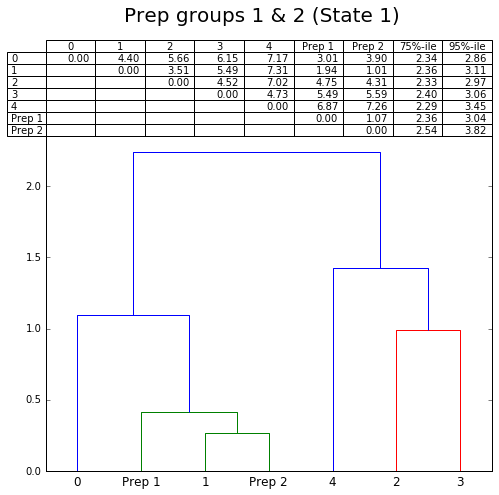

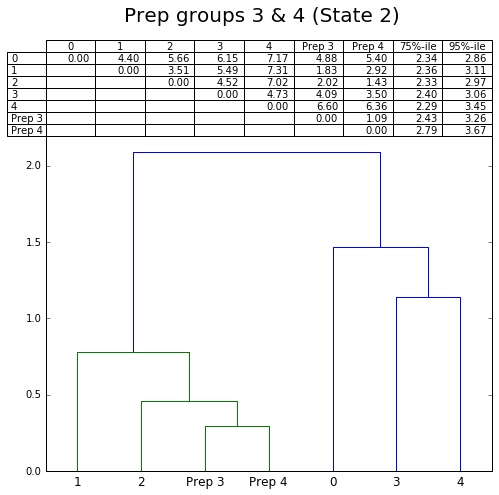

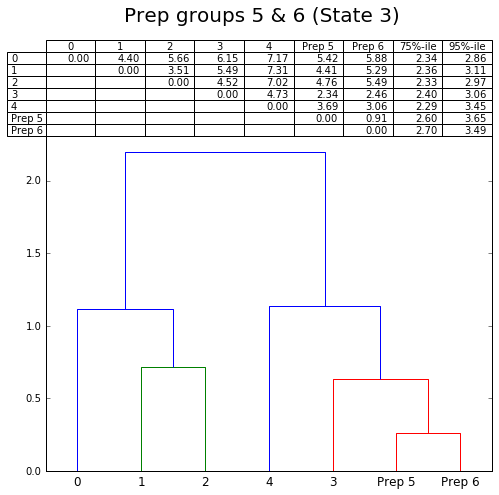

In [63]:
prep_groups = iter((('1','2'), ('3', '4'), ('5', '6'),))
for g in prep_groups:
    fig = PrepGroupDendrogram( g )

In [64]:
def PrepGroup3D( prep_group ):
    early_prep, late_prep = prep_group
    early_list = prep_groupings[ early_prep ]
    late_list = prep_groupings[ late_prep ]
    early_days = [ _[0] for _ in early_list ]
    late_days = [ _[0] for _ in late_list ]
    state_int = int(late_prep) / 2
    state_label = str( state_int )
    zipped_day_state = zip( trans_day_labels, trans_state_labels )

    early_truth_table = [ day in early_days and state == state_label for day, state in zipped_day_state ]
    early_indices = np.where( early_truth_table )[0]
    early_space = trans_space[ early_indices ]

    late_truth_table = [ day in late_days and state == state_label for day, state in zipped_day_state ]
    late_indices = np.where( late_truth_table )[0]
    late_space = trans_space[ late_indices ]
    
    states_wanted = [ str(_) for _ in ( state_int-1, state_int, state_int+1)]
    chart_title = 'Prep groups {} & {} (State {})'.format( early_prep, late_prep, state_label )
    return StateSpacePlotLDA3D( training_space, training_labels, states_wanted,
                     early_space, 'Prep' + early_prep, chart_title,
                    late_space, 'Prep' + late_prep, LDA_dims_wanted=(0,1,2))

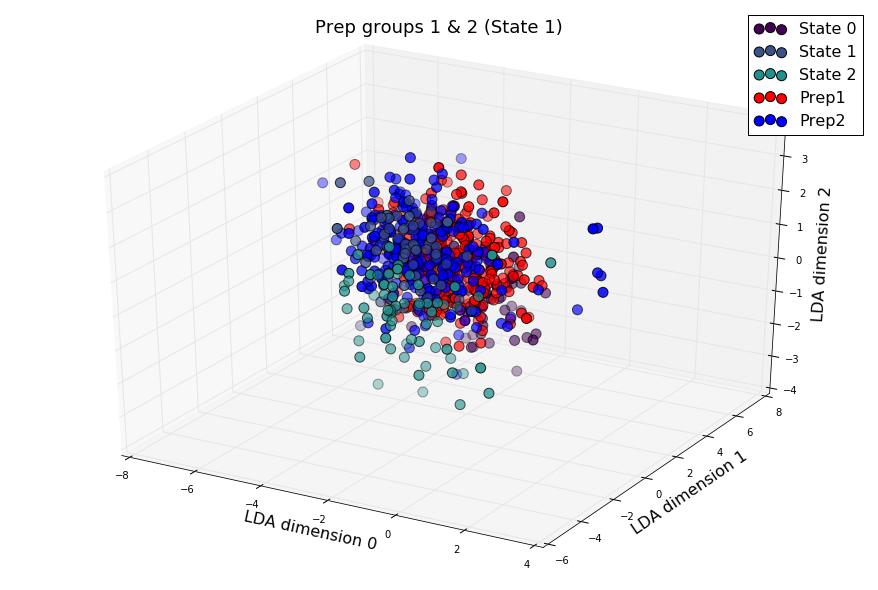

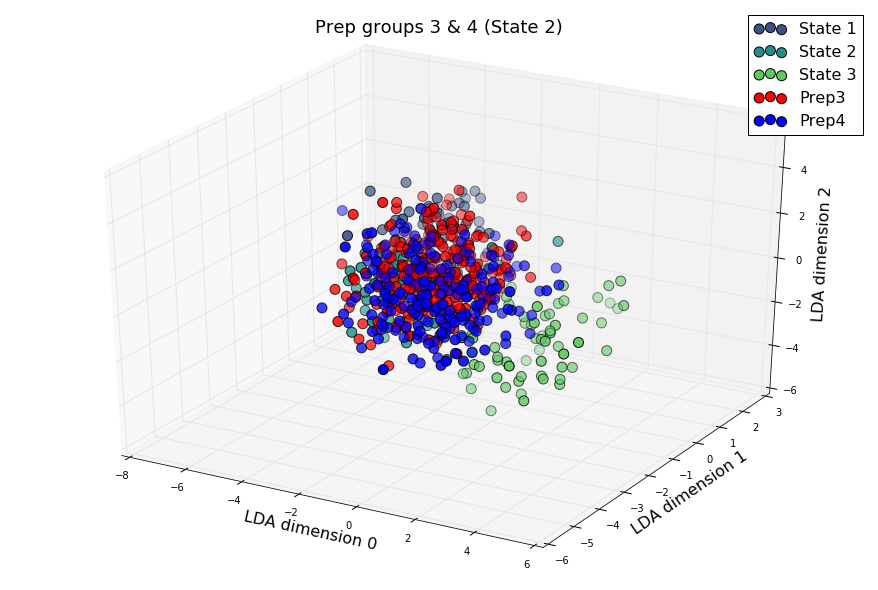

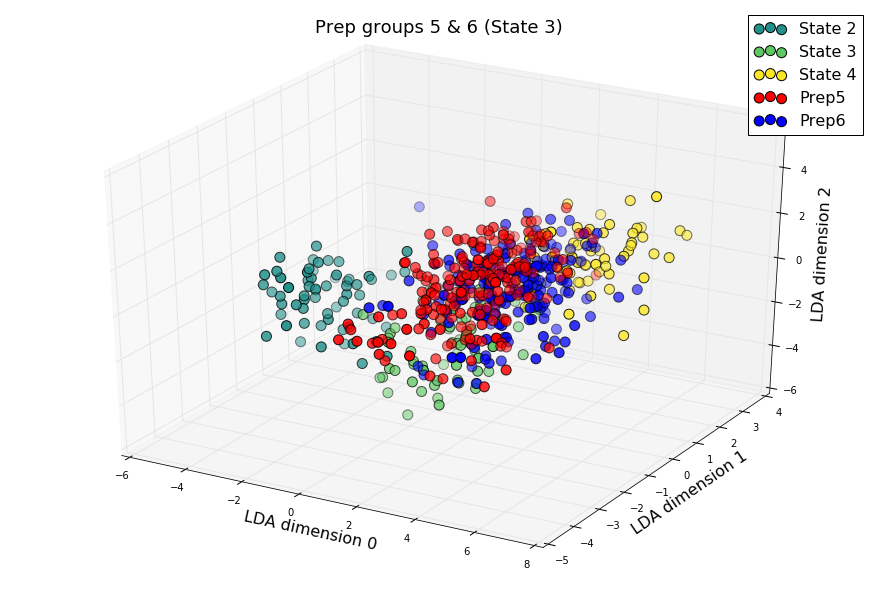

In [65]:
prep_groups = iter((('1','2'), ('3', '4'), ('5', '6'),))
for g in prep_groups:
    fig = PrepGroup3D( g )